<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [2]:
## Function to convert strings to float

def strtofloat(data):
    """argument have to be a list of list"""
    import re
    new_data = []
    for row in data:
        new_row = []
        for item in row:
            if  re.match("[+-]?(?:\d+(?:\.\d+)?|\.\d+)$", item):
                new_row.append(float(item))
            else:
                new_row.append(item)

        new_data.append(new_row)

    return new_data

In [3]:
## Open CSV file

with open('sat_scores.csv', 'rb') as f:
    reader = csv.reader(f)
    data_r = strtofloat(reader)

In [4]:
last_r = data_r[-1]
last_r

['All', 45.0, 506.0, 514.0]

In [5]:
# Assign header and data (remove last row)

header = data_r[0]
data = data_r[1:-1]

state = []
rate = []
verbal = []
math = []

for row in data:
        
    state.append(row[0])
    rate.append(row[1])
    verbal.append(row[2])
    math.append(row[3])
        
data_list = [state,rate,verbal,math]     
data_dict = dict(zip(header,data_list))

print (data_dict)

{'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0], 'Verbal': [50

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [6]:
# Convert SAT dictionary into Dataframe

dict_to_pd = pd.DataFrame(data_dict)

# dtypes
dict_to_pd.dtypes

Math      float64
Rate      float64
State      object
Verbal    float64
dtype: object

In [7]:
# Read CSV directly using pd.read_csv - remove last row

data_pd = pd.read_csv('sat_scores.csv')
data_pd.drop(51,axis=0,inplace=True)

# dtypes
data_pd.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---
<b>The dtype when we convert from dictionary to Dataframe will be a string type by default UNLESS converted into a float of integer.

The dtypes of data when we load it directly using pd.read_csv from the file will automatically be numeric.</b>

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [8]:
# First 10 rows of data

data_pd.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [9]:
# Find out more information about the data

data_pd.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


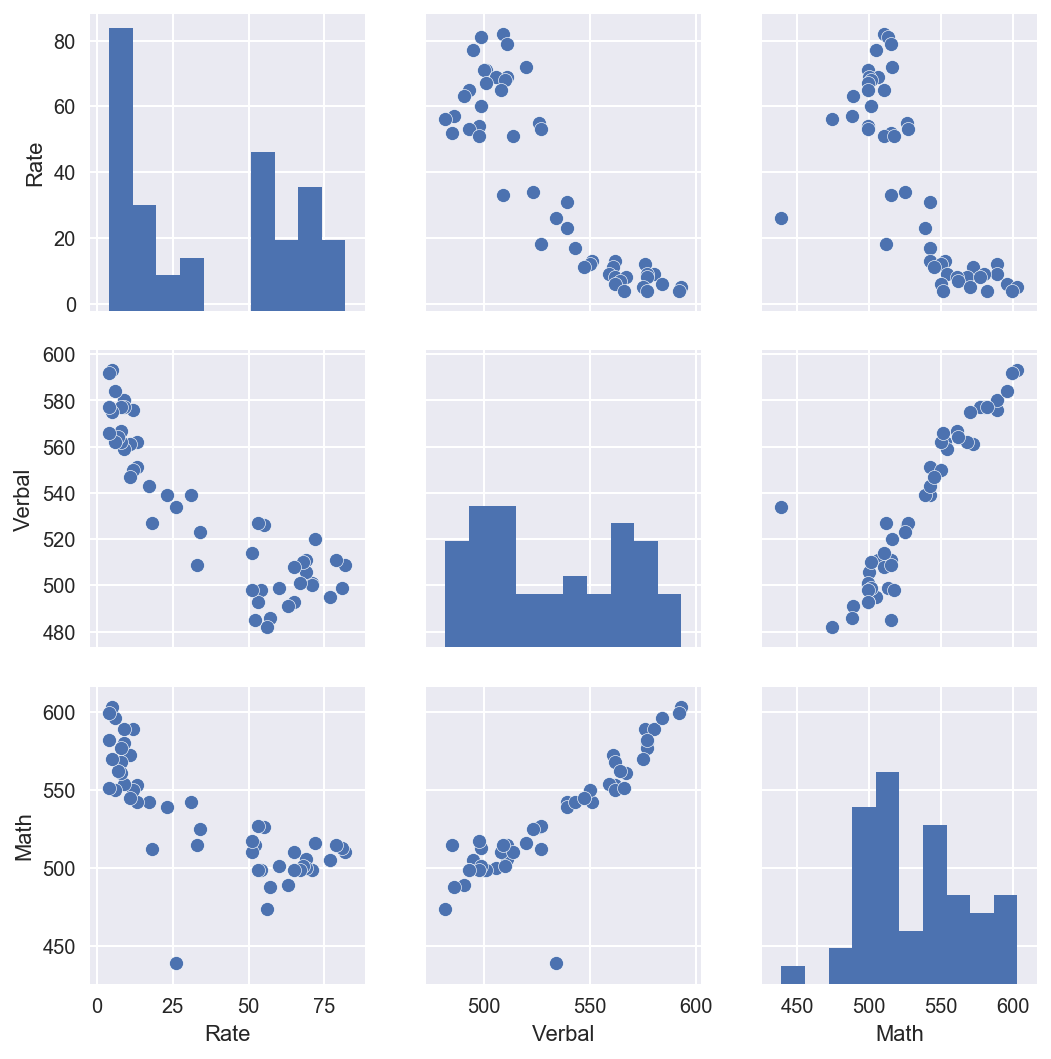

In [10]:
# Plot pairplot to visualise the relationship between the features

sns.pairplot(data_pd)

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---

<b>Research :</b> https://collegereadiness.collegeboard.org/sat/inside-the-test<br><br>

<b>Verbal:</b> (Mean, Median or Mode) Score for Verbal Test of each state (Max score of 800) <br>
<b>Math: </b>(Mean, Median or Mode) Score for Math Test of each state (Max score of 800)<br>
<b>Rate: </b>Failure rate (There seems to be inverse corelation with Verbal and Math)<br>

<b>Inference:</b> <u>Median Score</u> for Verbal and Math

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [11]:
desc = ['column_name','type','description','data_shape']
col_name = ['State','Rate','Verbal','Math']
col_type = ['str','int','int','int']
col_desc = ['Abbrevation of each state','SAT failure rate (percentage)',
            'Median score for verbal test out of 800','Median score for math test out of 800']
shape = data_pd.shape

data = [col_name,col_type,col_desc]

data_dict = {desc[0]:data[0],
            desc[1]:data[1],
            desc[2]:data[2]}
data_dict
data_dict = pd.DataFrame(data_dict)

print 'Data shape = (Rows:Columns), ',shape
print data_dict


Data shape = (Rows:Columns),  (51, 4)
  column_name                              description type
0       State                Abbrevation of each state  str
1        Rate            SAT failure rate (percentage)  int
2      Verbal  Median score for verbal test out of 800  int
3        Math    Median score for math test out of 800  int


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [12]:
# Customising figure size and assigning variable to data

sns.set(rc={"figure.figsize": (15, 8)})

rate = data_pd['Rate']
verbal = data_pd['Verbal']
math = data_pd['Math']

[<matplotlib.text.Text at 0x111a4c590>, <matplotlib.text.Text at 0x111aa16d0>]

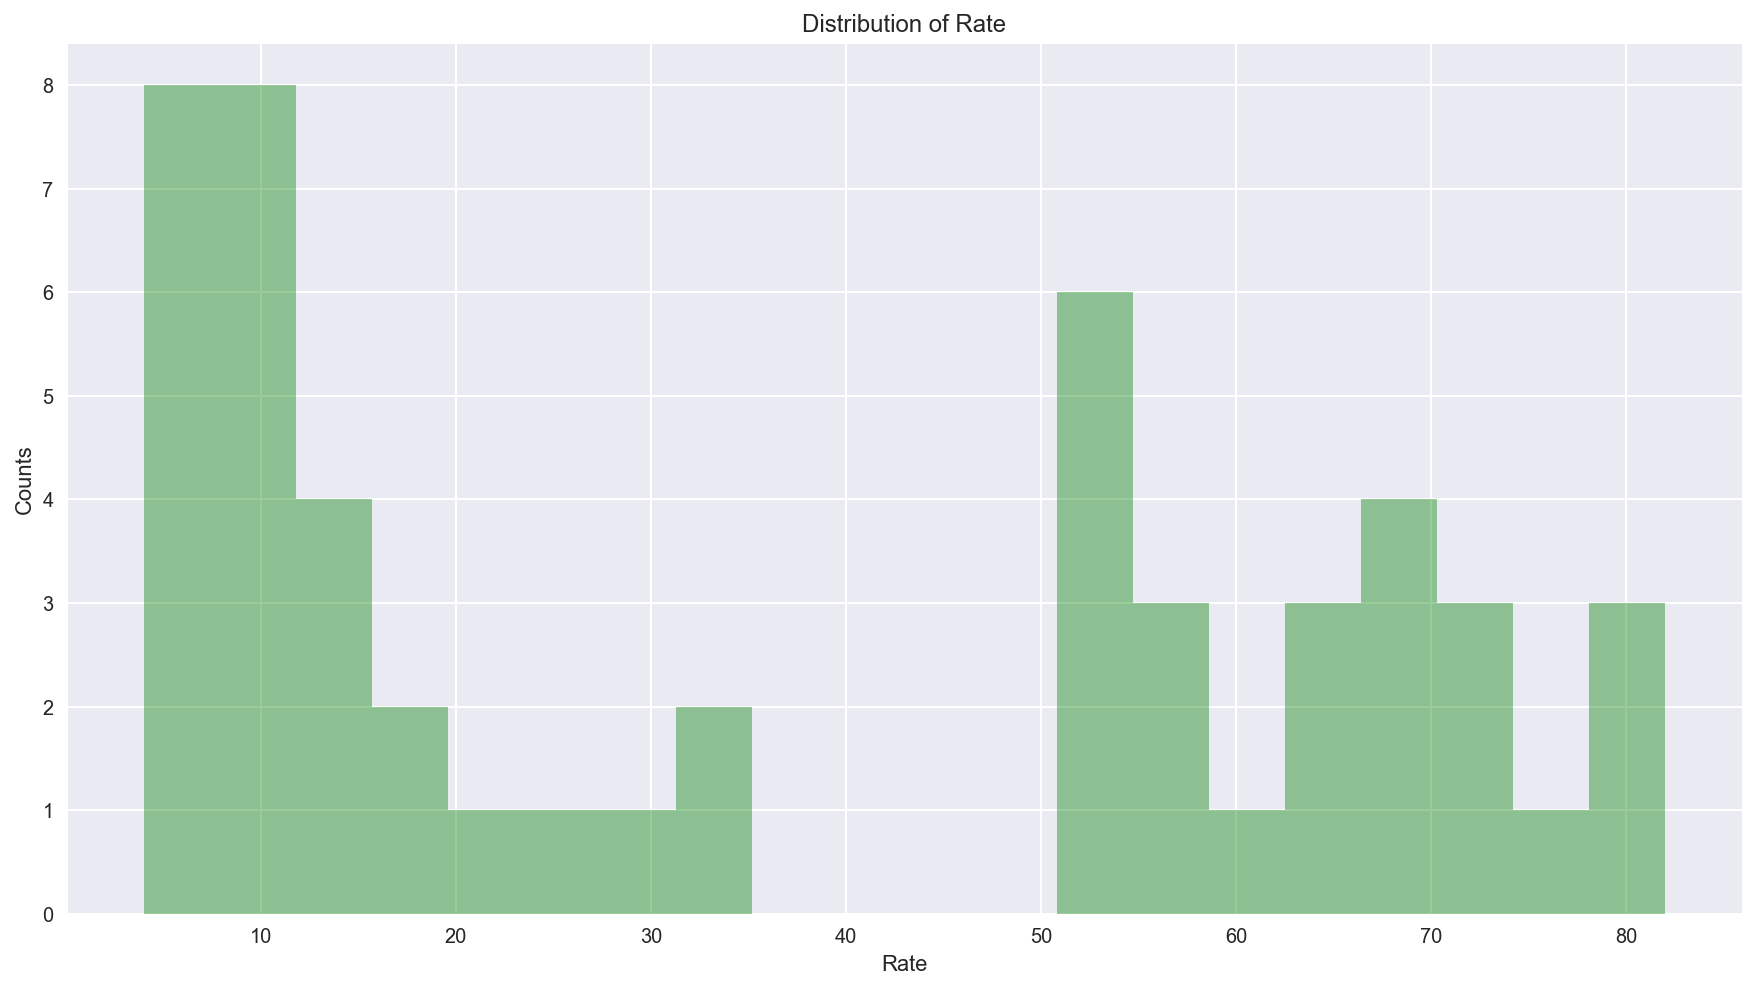

In [13]:
# Plot distrbution of Rate

ax_r = sns.distplot(rate,kde=False,bins=20,color='g')
ax_r.set(ylabel='Counts',title='Distribution of Rate')

[<matplotlib.text.Text at 0x1129b9f50>, <matplotlib.text.Text at 0x1129ef410>]

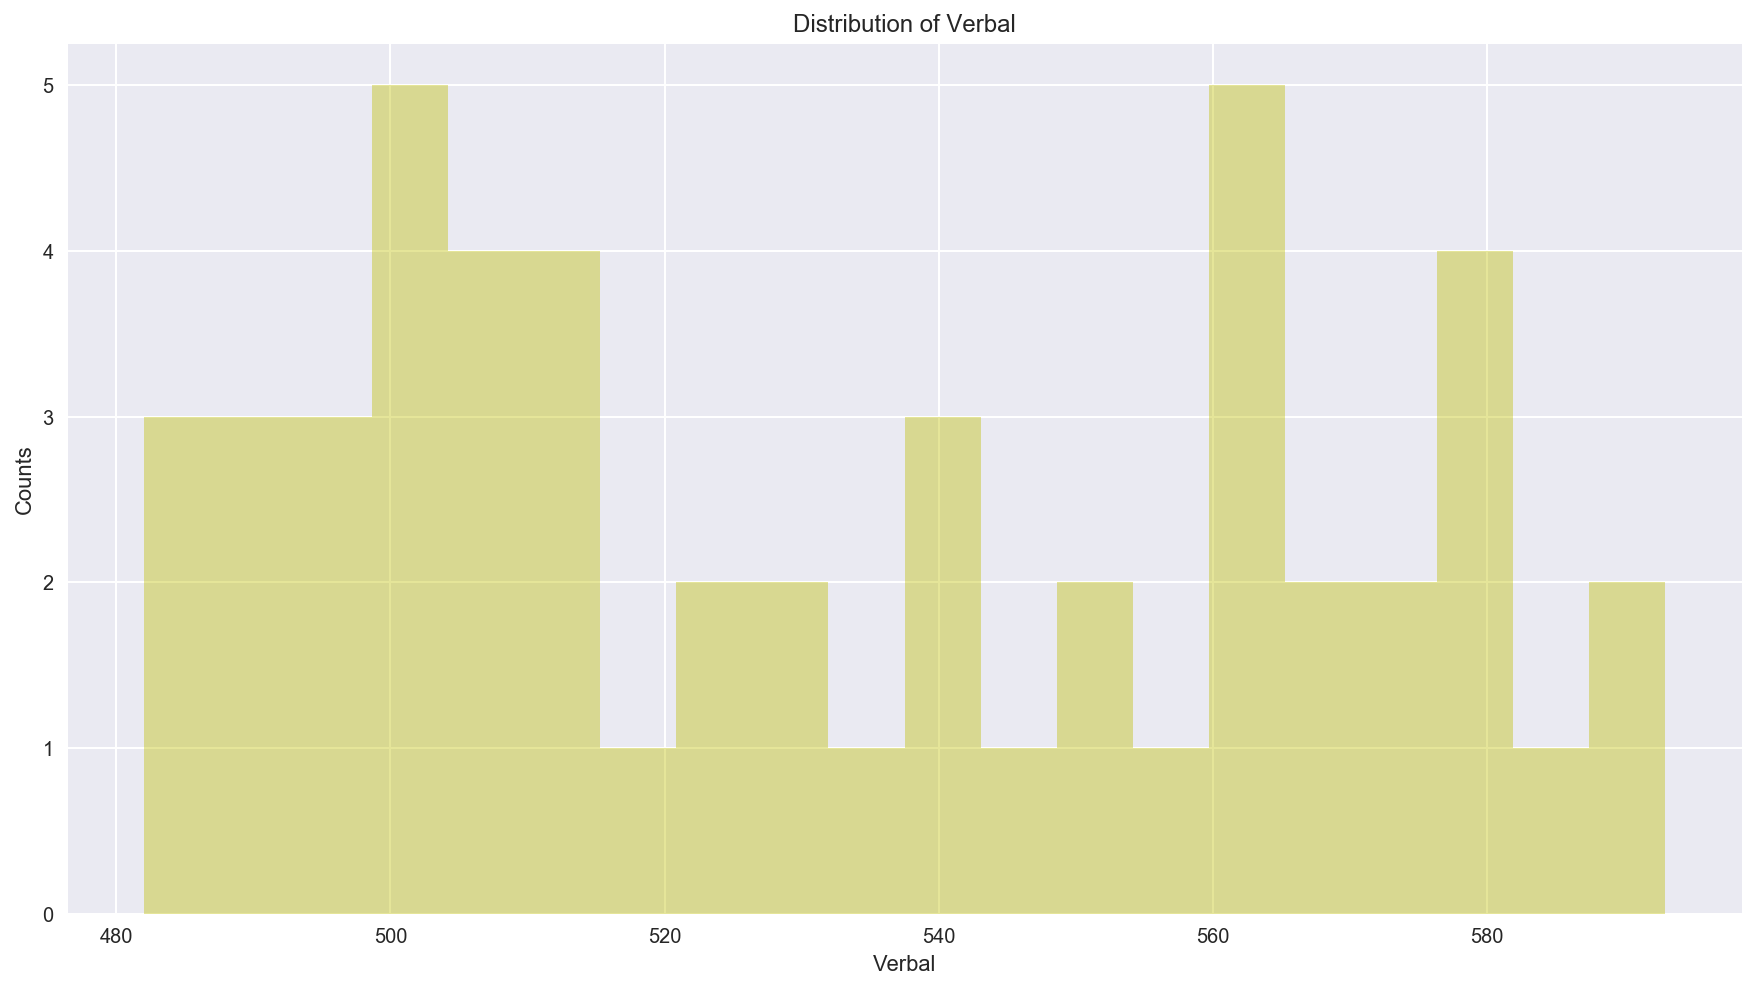

In [14]:
# Plot distribution of Verbal

ax_v = sns.distplot(verbal,kde=False,bins=20,color = 'y')
ax_v.set(ylabel='Counts',title='Distribution of Verbal')

[<matplotlib.text.Text at 0x113183f90>, <matplotlib.text.Text at 0x113855810>]

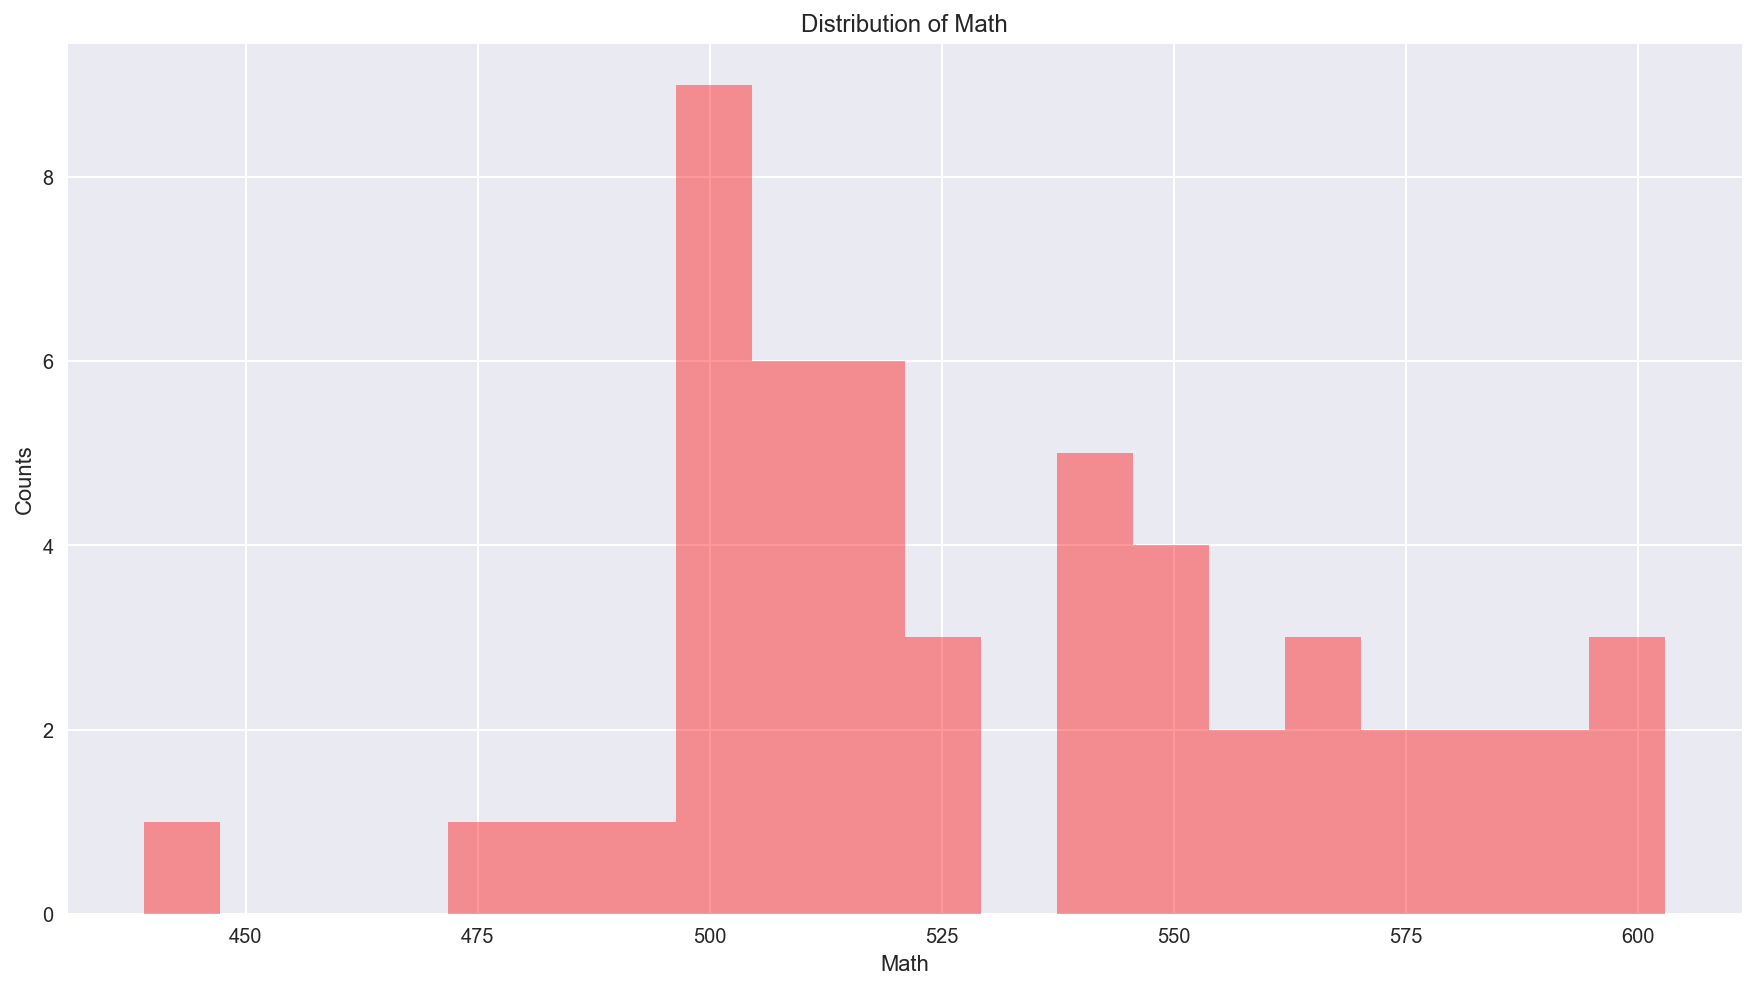

In [15]:
ax_m = sns.distplot(math,kde=False,bins=20,color='r')
ax_m.set(ylabel='Counts',title='Distribution of Math')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


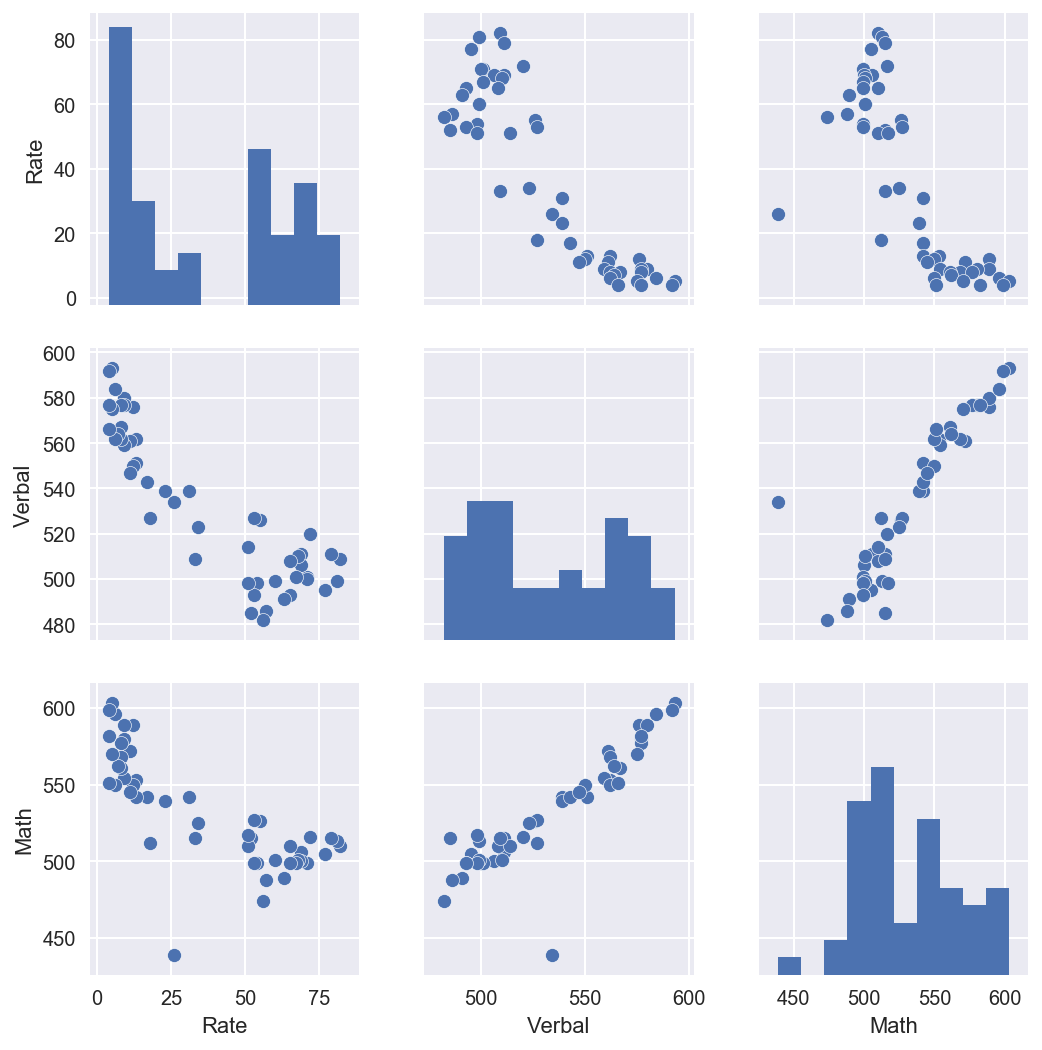

In [16]:
sns.pairplot(data_pd)

<b> Observation: </b>
<br>Positive co-relation between Math and Verbal
<br>Negative co-relation between Rate and Math(and Verbal)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


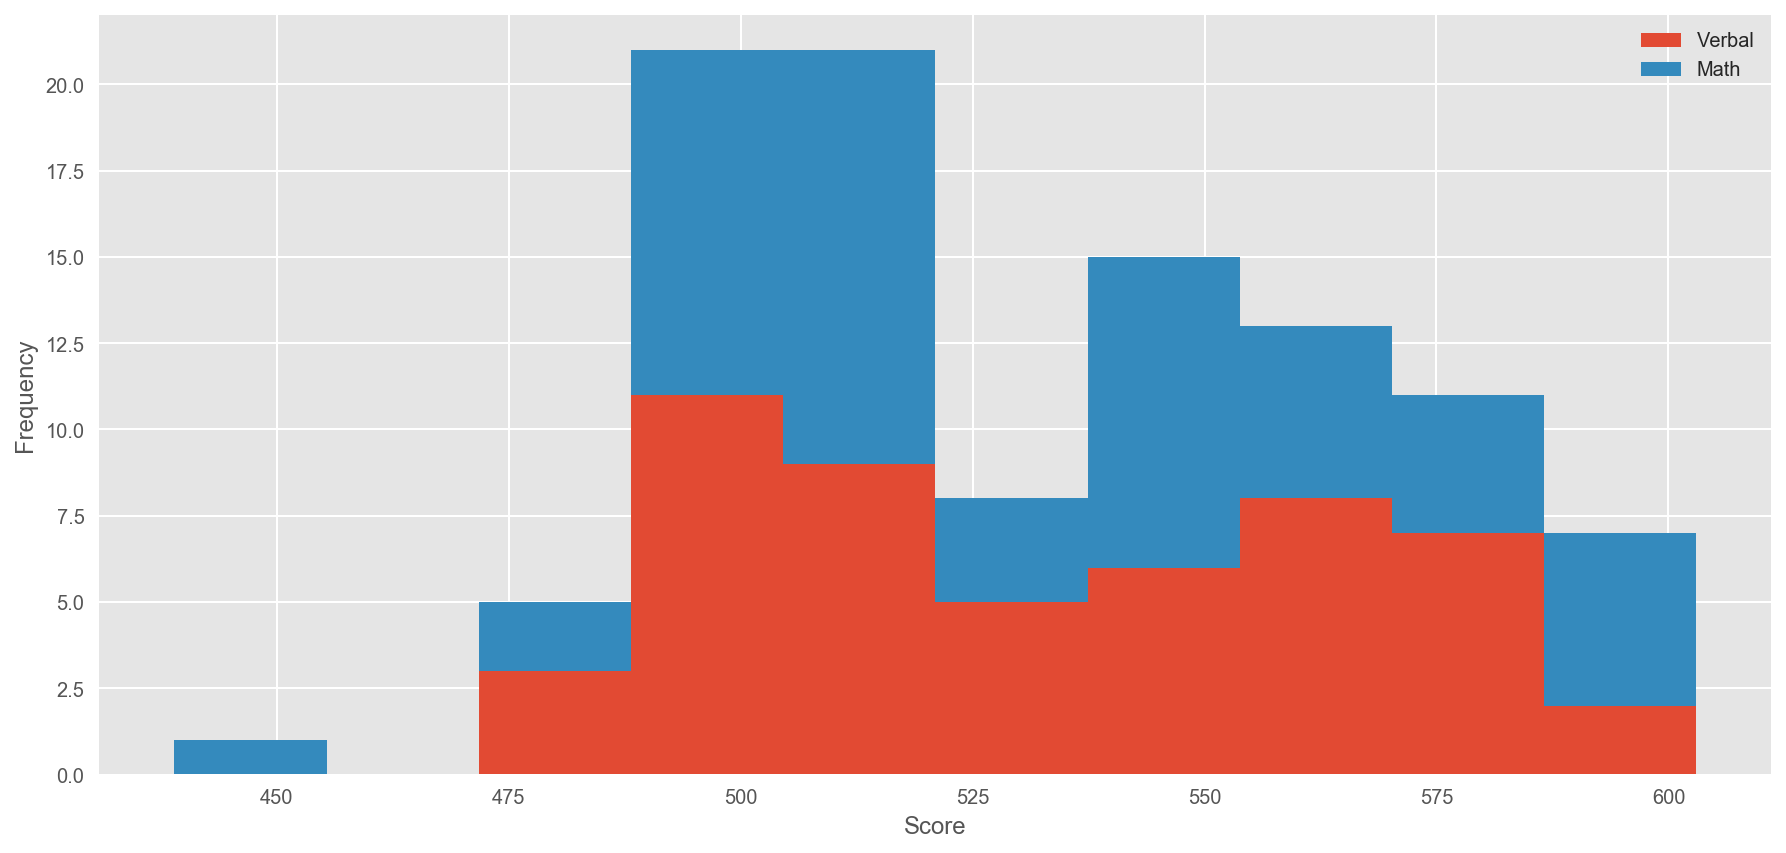

In [17]:
# Plot stacked histogram

import matplotlib.pyplot as plt
plt.style.use('ggplot')
data_pd[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(15,7))
plt.xlabel('Score')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---

<b>Scatterplot vs Box-plot vs histogram</b>
<br> Scatterplot - able to visualise the corelation between the two variables + visualise outliers
<br> Histogram - only able to see the distribution of one variable
<br> Box-plot - able to compare the median and percentiles between two variables + visualise the outliers

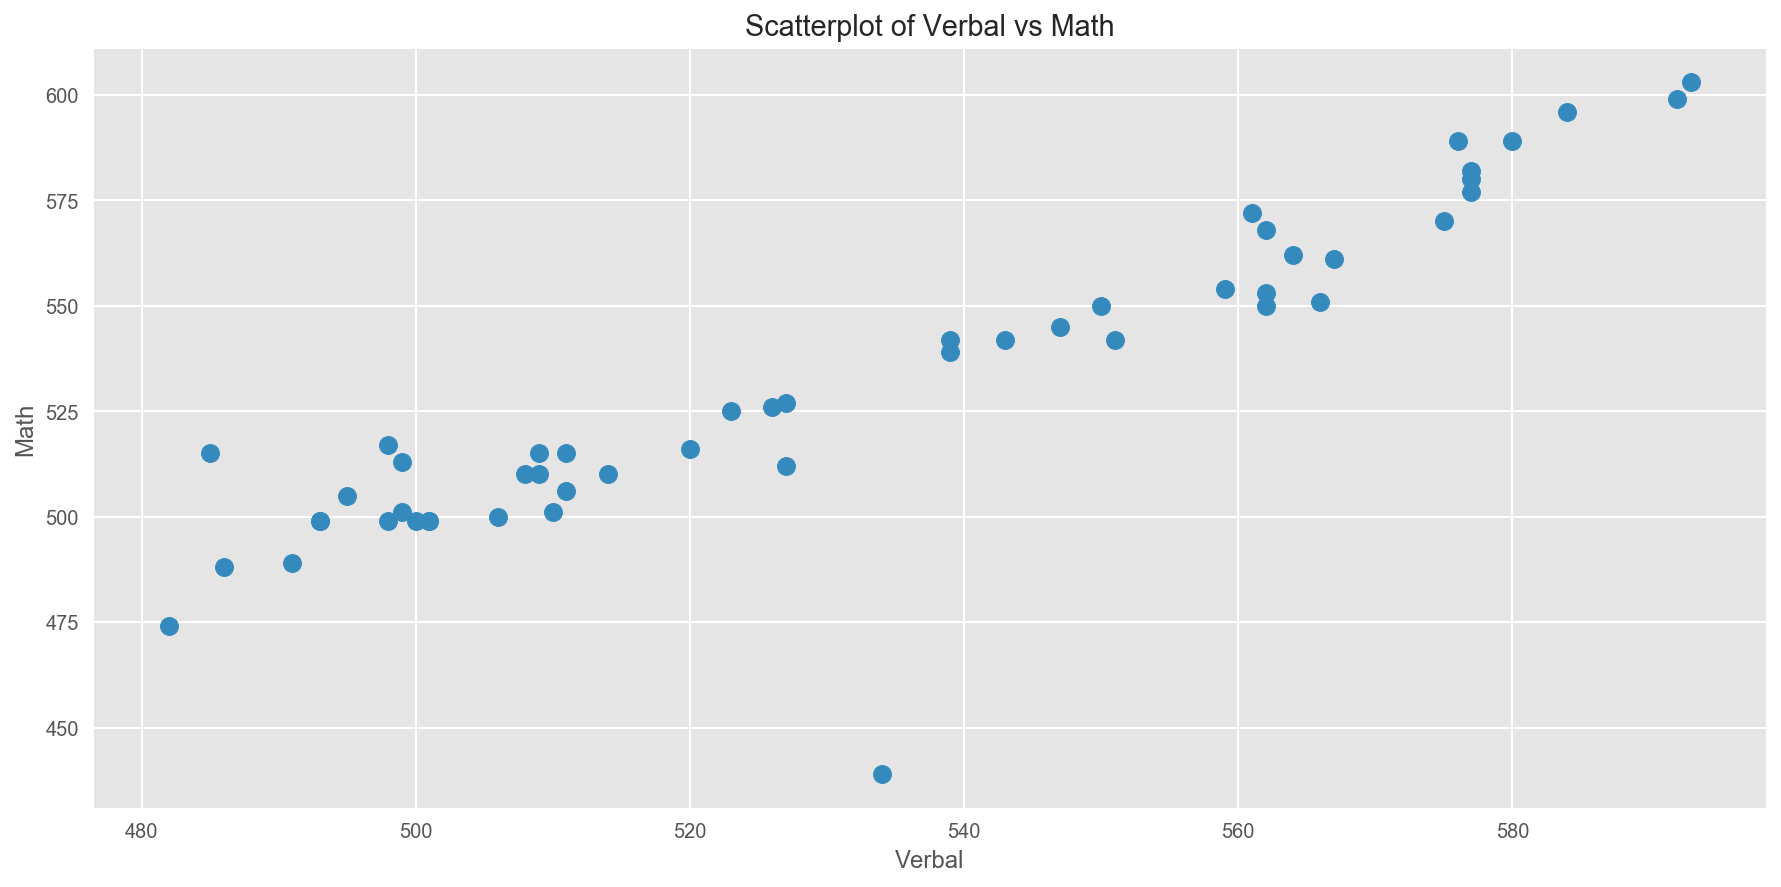

In [18]:
# Plot Scatterplot 
data_pd.plot.scatter('Verbal','Math', figsize=(15,7),s=80)
plt.title('Scatterplot of Verbal vs Math')

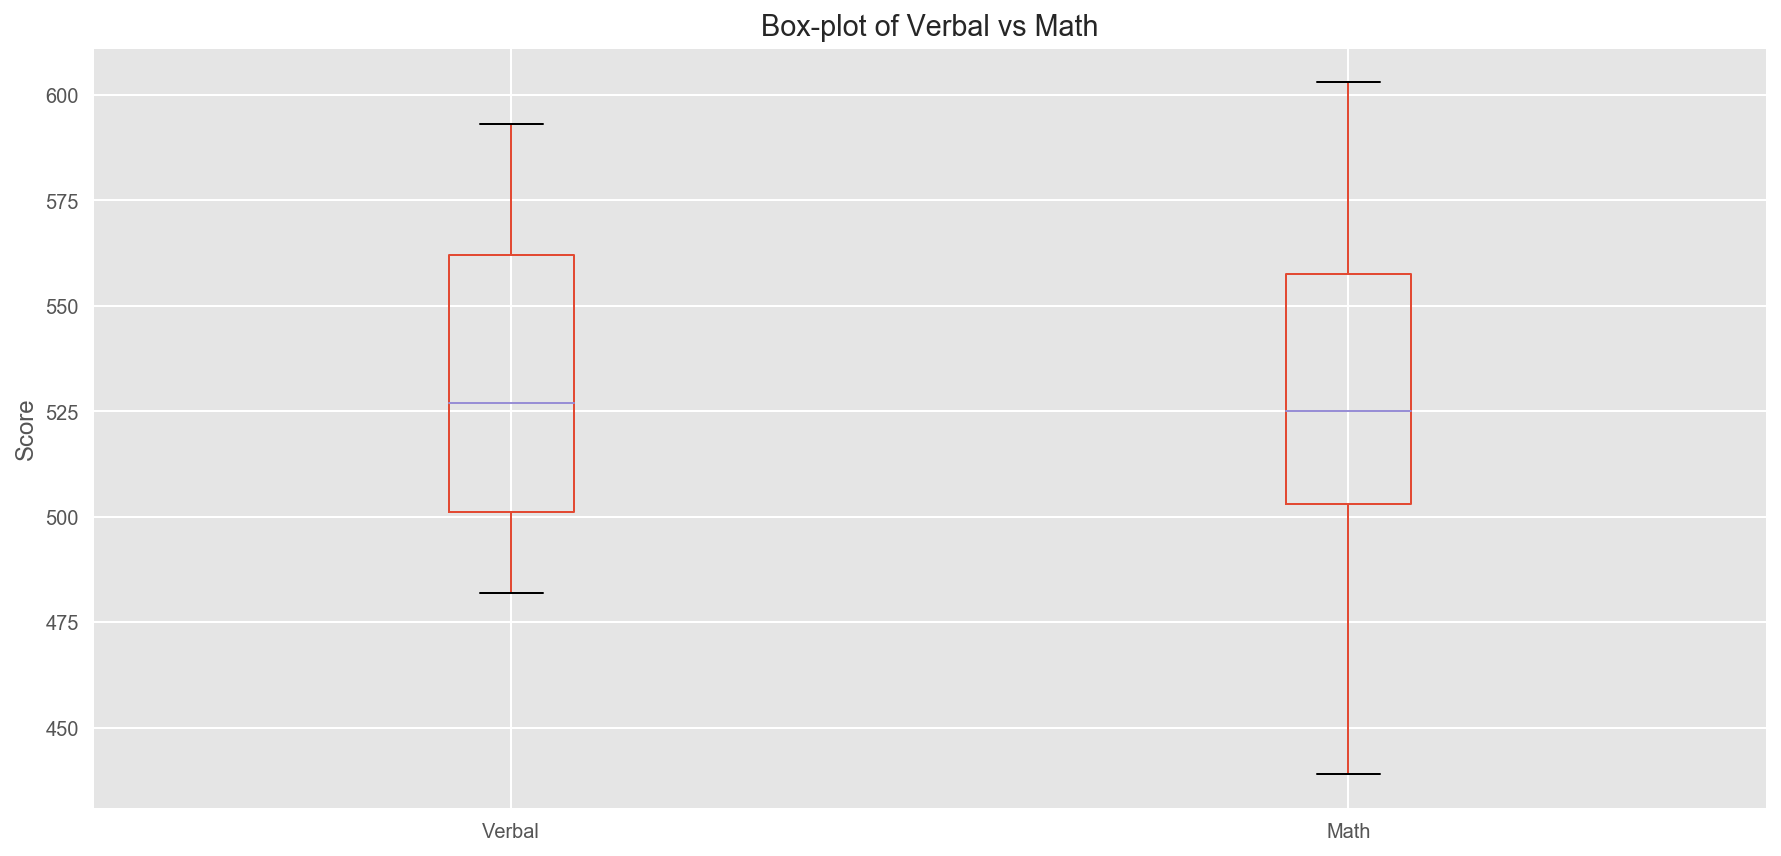

In [19]:
# Plot Box-plot
data_pd[['Verbal', 'Math']].plot(kind='box', figsize=(15,7))
plt.title('Box-plot of Verbal vs Math')
plt.ylabel('Score')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---

<b>Oberservation: </b>
<br>As Rate uses different scale from Verbal and Math, the combined chart is not a good data visualisation for comparison 
<br><br><b> Recommended solution:</b>
<br> To normalise the scales

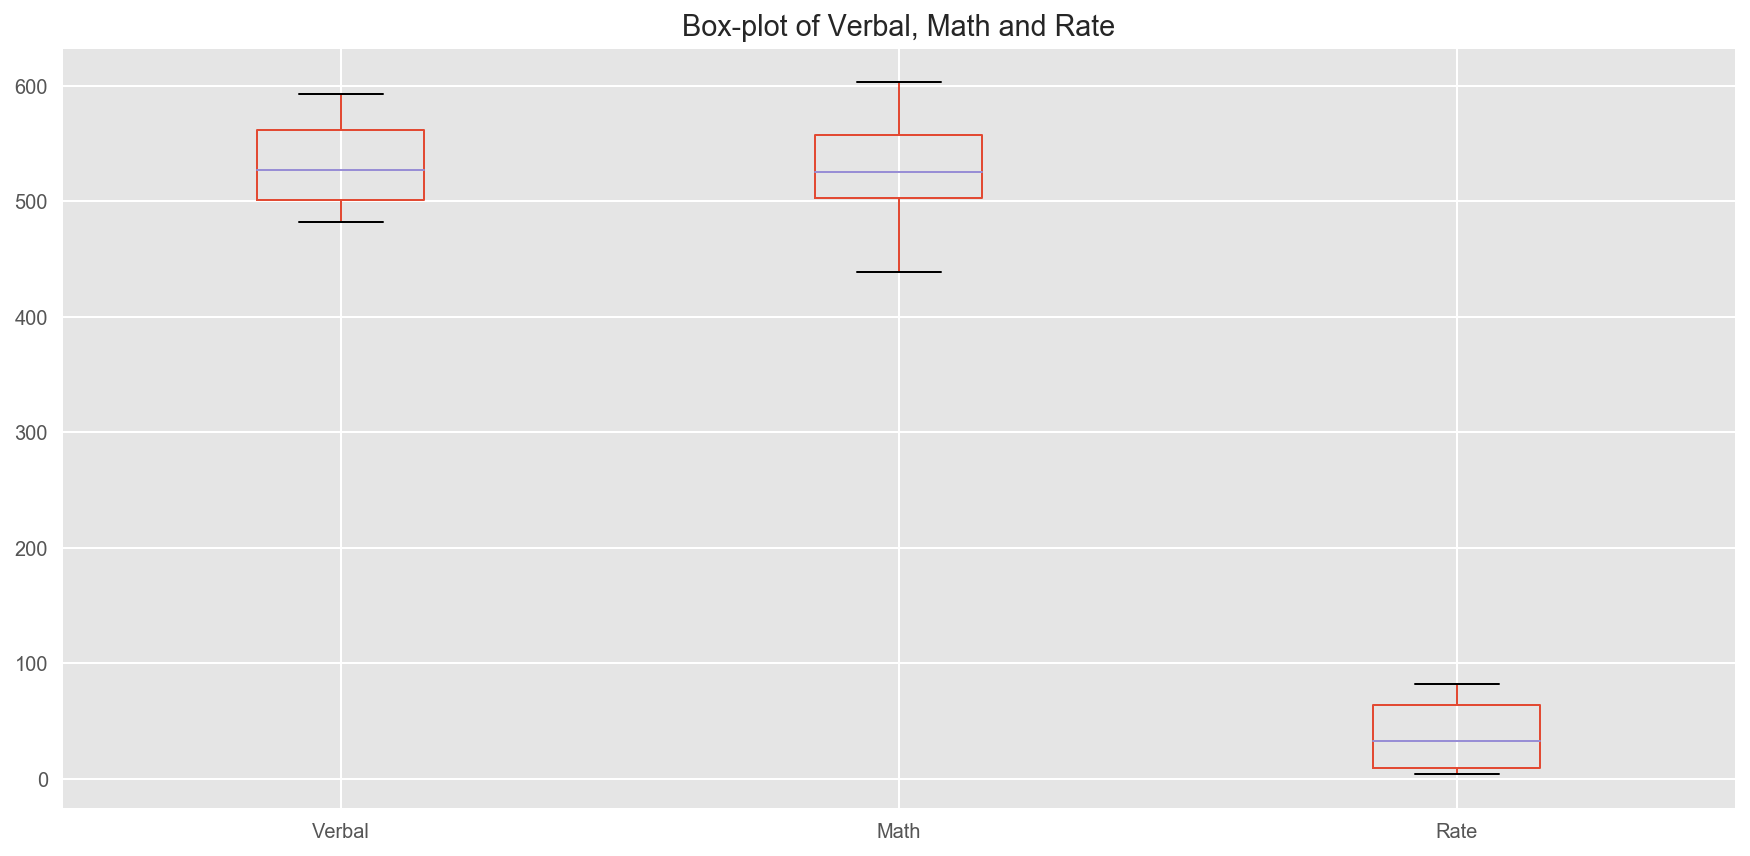

In [20]:
# Plot box-plot of Verbal, Math and Rate in one chart

data_pd[['Verbal', 'Math','Rate']].plot(kind='box', figsize=(15,7))
plt.title('Box-plot of Verbal, Math and Rate')

<b> Normalise the scale - Formula</b>
<br>standardized_variable = (variable - mean_of_variable) / std_dev_of_variable

In [22]:
data_pd_n = pd.DataFrame(columns=data_pd.columns)

In [26]:
data_pd_n['State'] = data_pd['State']

In [27]:
# Normalise Verbal Function

def standardize(value):
        value = (value - (data_pd['Verbal'].mean()))/data_pd['Verbal'].std()
        return value

In [28]:
data_pd_n['Verbal'] = data_pd['Verbal'].apply(standardize)

In [29]:
# Normalise Math Function

def standardize2(value):
        value = (value - (data_pd['Math'].mean()))/data_pd['Math'].std()
        return value

In [30]:
data_pd_n['Math'] = data_pd['Math'].apply(standardize2)

In [31]:
# Normalise Rate Function

def standardize3(value):
        value = (value - (data_pd['Rate'].mean()))/data_pd['Rate'].std()
        return value

In [32]:
data_pd_n['Rate'] = data_pd['Rate'].apply(standardize3)

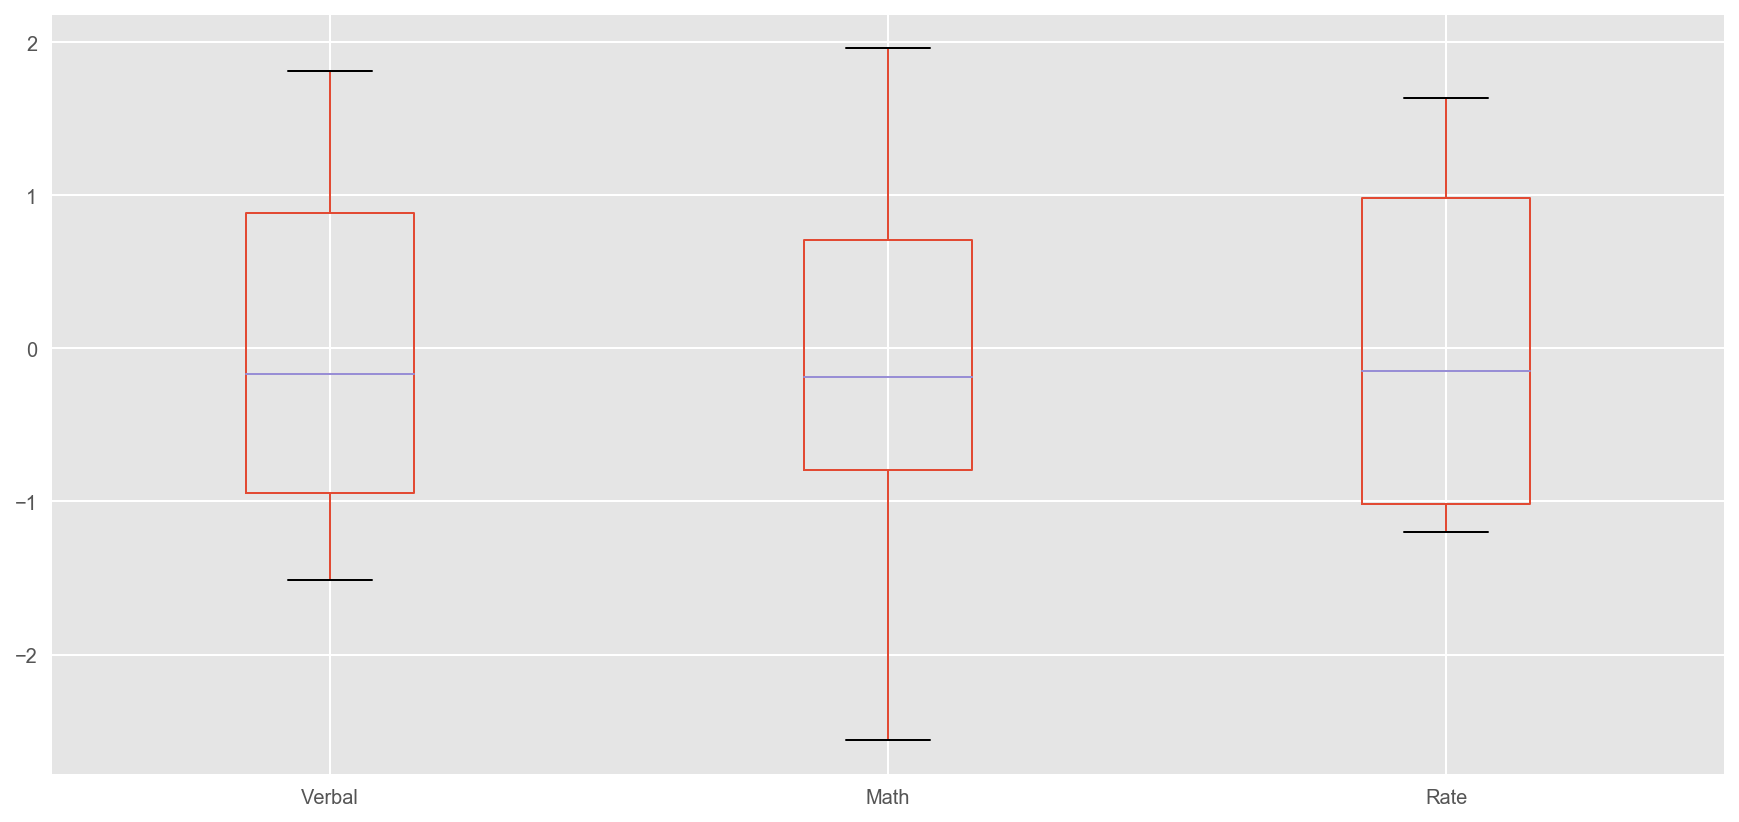

In [33]:
# Plot Normalised Data

data_pd_n[['Verbal','Math','Rate']].plot(kind='box', figsize=(15,7))

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---

<br>24 out of 52 states are above the mean of Verbal scores
<br>Looking at the graph, distribution of Verbal score is non-symmetric and bimodal.
<br>Based on the number of states that are above the mean, we can assume that it is left-skewed, where median < mean.

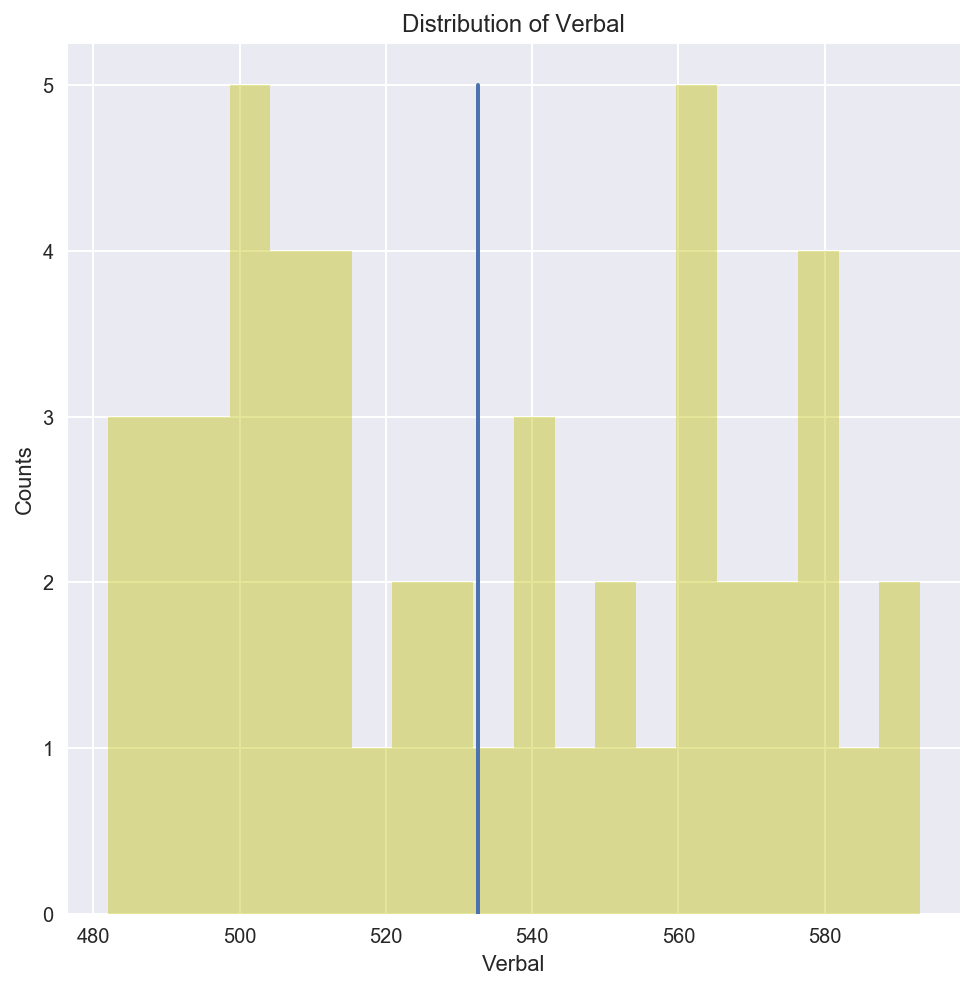

In [34]:
# Plot distribution of Verbal

sns.set(rc={"figure.figsize": (8, 8)})
ax_v = sns.distplot(data_pd.Verbal,kde=False,bins=20,color = 'y')
ax_v.set(ylabel='Counts',title='Distribution of Verbal')
mean = plt.plot([data_pd.Verbal.mean(), data_pd.Verbal.mean()], [0, 5], linewidth=2)

In [35]:
data_mask = data_pd.Verbal>data_pd.Verbal.mean()
list_states = data_pd[data_mask]['State']
print 'list of states above the mean: ',list(list_states)
print list_states.count(),' states are above the mean'

list of states above the mean:  ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24  states are above the mean


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---

<br>26 out of 52 states are above the mean of Verbal scores

In [36]:
data_mask2 = data_pd.Verbal>data_pd.Verbal.median()
list_states2 = data_pd[data_mask2]['State']
print 'list of states above the median: ',list(list_states)
print list_states2.count(),' states are above the median'

list of states above the median:  ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24  states are above the median


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [37]:
# Create a new column

data_pd['Verbal-Math'] = data_pd.Verbal - data_pd.Math

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [38]:
verbal = data_pd.Verbal
math = data_pd.Math
rate = data_pd.Rate
v_m = data_pd['Verbal-Math']

In [39]:
# Filter: If value is positive, Verbal score > Math score

v_more_m = data_pd[v_m > 0]['State'].sort_values(ascending=False)
print v_more_m.head(3)

35    WY
29    WV
7     VT
Name: State, dtype: object


In [40]:
# Filter: If value is negative, Verbal score < Math - ascending = True because of negative sign

m_more_v = data_pd[v_m < 0]['State'].sort_values(ascending=True)
print m_more_v.head(3)

24    AZ
23    CA
26    CO
Name: State, dtype: object


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [41]:
# Dataframe excluding State

data_pd_num = data_pd.drop('State',axis=1)

In [58]:
# Correlation matrix

corr = data_pd_num.corr()
print corr

                 Rate    Verbal      Math  Verbal-Math
Rate         1.000000 -0.888121 -0.773419    -0.098671
Verbal      -0.888121  1.000000  0.899909     0.044527
Math        -0.773419  0.899909  1.000000    -0.395574
Verbal-Math -0.098671  0.044527 -0.395574     1.000000


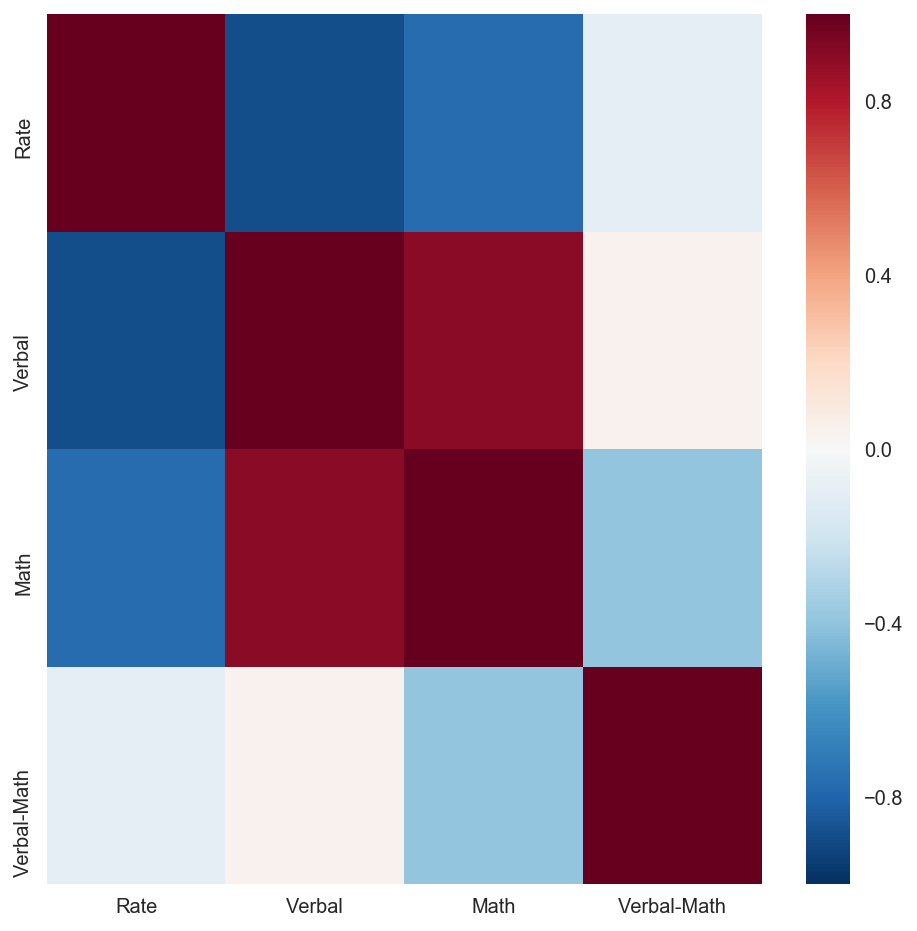

In [59]:
# Plot correlation matrix in heatmap

corr = data_pd_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<b> Observations:</b>
<br> Negative Correlations: Verbal vs Rate, Math vs Rate
<br> Positive Correlations: Math vs Verbal
<br> Little Correlations: Verbal-Math

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [49]:
# Assign .describe function to numeric data

data_desc = data_pd_num.describe()

In [53]:
# Write up of each row

describe = ['Total number of dataset','Average of the dataset',
            'Dispersion of the dataset from its mean','Minimum value',
           '25th percentile','50th percentile(Median)','75th percentile','Maximum value']
data_desc['Description'] = describe
data_desc

,Rate,Verbal,Math,Verbal-Math,Description
count,51.000000,51.000000,51.000000,51.000000,Total number of dataset
mean,37.000000,532.529412,531.843137,0.686275,Average of the dataset
std,27.550681,33.360667,36.287393,15.839811,Dispersion of the dataset from its mean
min,4.000000,482.000000,439.000000,-30.000000,Minimum value
25%,9.000000,501.000000,503.000000,-6.000000,25th percentile
50%,33.000000,527.000000,525.000000,0.000000,50th percentile(Median)
75%,64.000000,562.000000,557.500000,4.500000,75th percentile
max,82.000000,593.000000,603.000000,95.000000,Maximum value


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---
<br>1. The covariance is the measure of the extent to which two variables change in tandem while correlation measures how strongly the two variables are related
<br>2. Correlation = Covariance/(std(var1)*std(var2))
<br>3. Correlation matrix is preferred because it remains unaffected by the change in scale

In [61]:
# Covariance matrix

cov = data_pd_num.cov()
print cov

               Rate       Verbal         Math  Verbal-Math
Rate         759.04  -816.280000  -773.220000   -43.060000
Verbal      -816.28  1112.934118  1089.404706    23.529412
Math        -773.22  1089.404706  1316.774902  -227.370196
Verbal-Math  -43.06    23.529412  -227.370196   250.899608


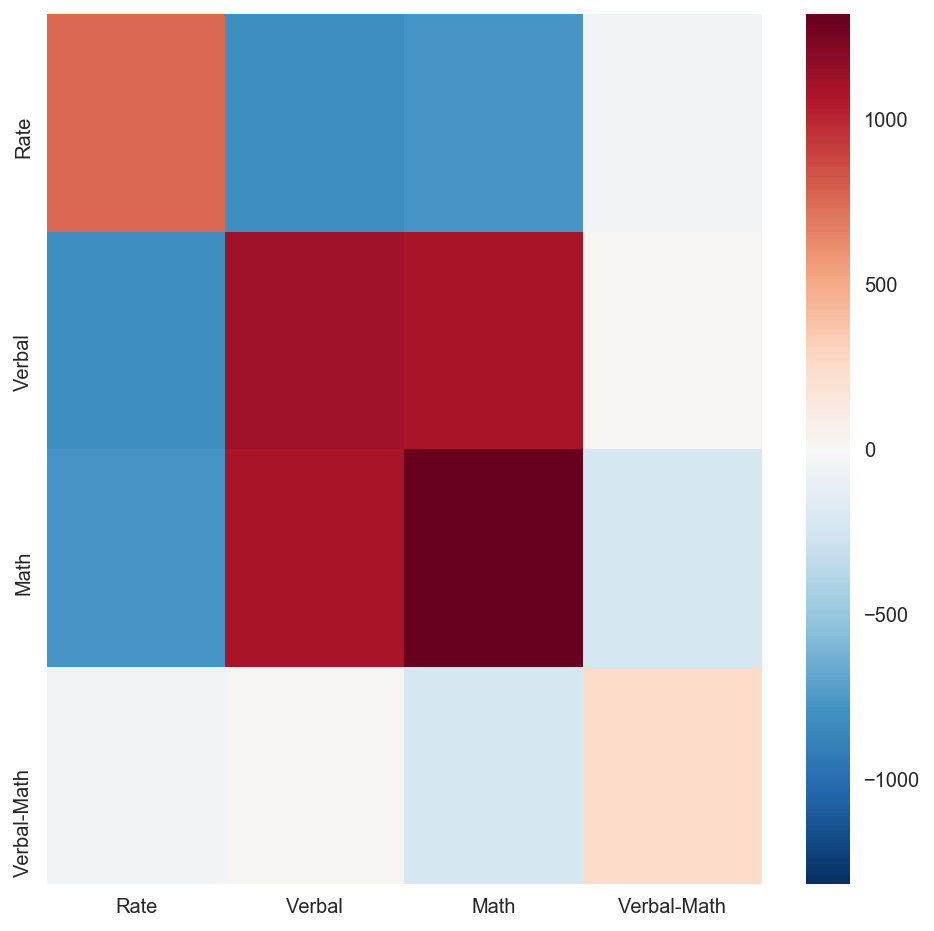

In [55]:
# Plot covariance matrix in heatmap

cov = data_pd_num.cov()
sns.heatmap(cov, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [64]:
# Normalised Covariance

cov_n = data_pd_n.cov()
print cov_n

            Rate    Verbal      Math
Rate    1.000000 -0.888121 -0.773419
Verbal -0.888121  1.000000  0.899909
Math   -0.773419  0.899909  1.000000


In [65]:
# Normalised Correlation

corr_n = data_pd_n.corr()
print corr_n

            Rate    Verbal      Math
Rate    1.000000 -0.888121 -0.773419
Verbal -0.888121  1.000000  0.899909
Math   -0.773419  0.899909  1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [36]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Open as slideshow:

jupyter nbconvert projects_datascience/Project_2_Exploratory_Data_Analysis_(EDA).ipynb --to slides --post serve